In [2]:
import numpy as np # Linear Algebra
import pandas as pd # Handling Data
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # Visualization

from sklearn.pipeline import Pipeline # Data Pipeline
from sklearn.impute import SimpleImputer # Imputation / Handling missing values
from sklearn.preprocessing import StandardScaler # Scalling data
from sklearn.feature_selection import SelectKBest # Selecting features
from sklearn.decomposition import PCA # dimensionality reduction
from sklearn.model_selection import train_test_split # splitting data
from sklearn.ensemble import RandomForestClassifier # Classifier
from sklearn.neighbors import KNeighborsClassifier # Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier # Feature selection
from sklearn.metrics import classification_report, confusion_matrix # Performance Measures
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV # Hyperparameter tuning
from scipy.stats import randint # Random Integer

import warnings # for mitigating warnings
warnings.filterwarnings('ignore') # same as above

In [4]:
df = pd.read_csv('./Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

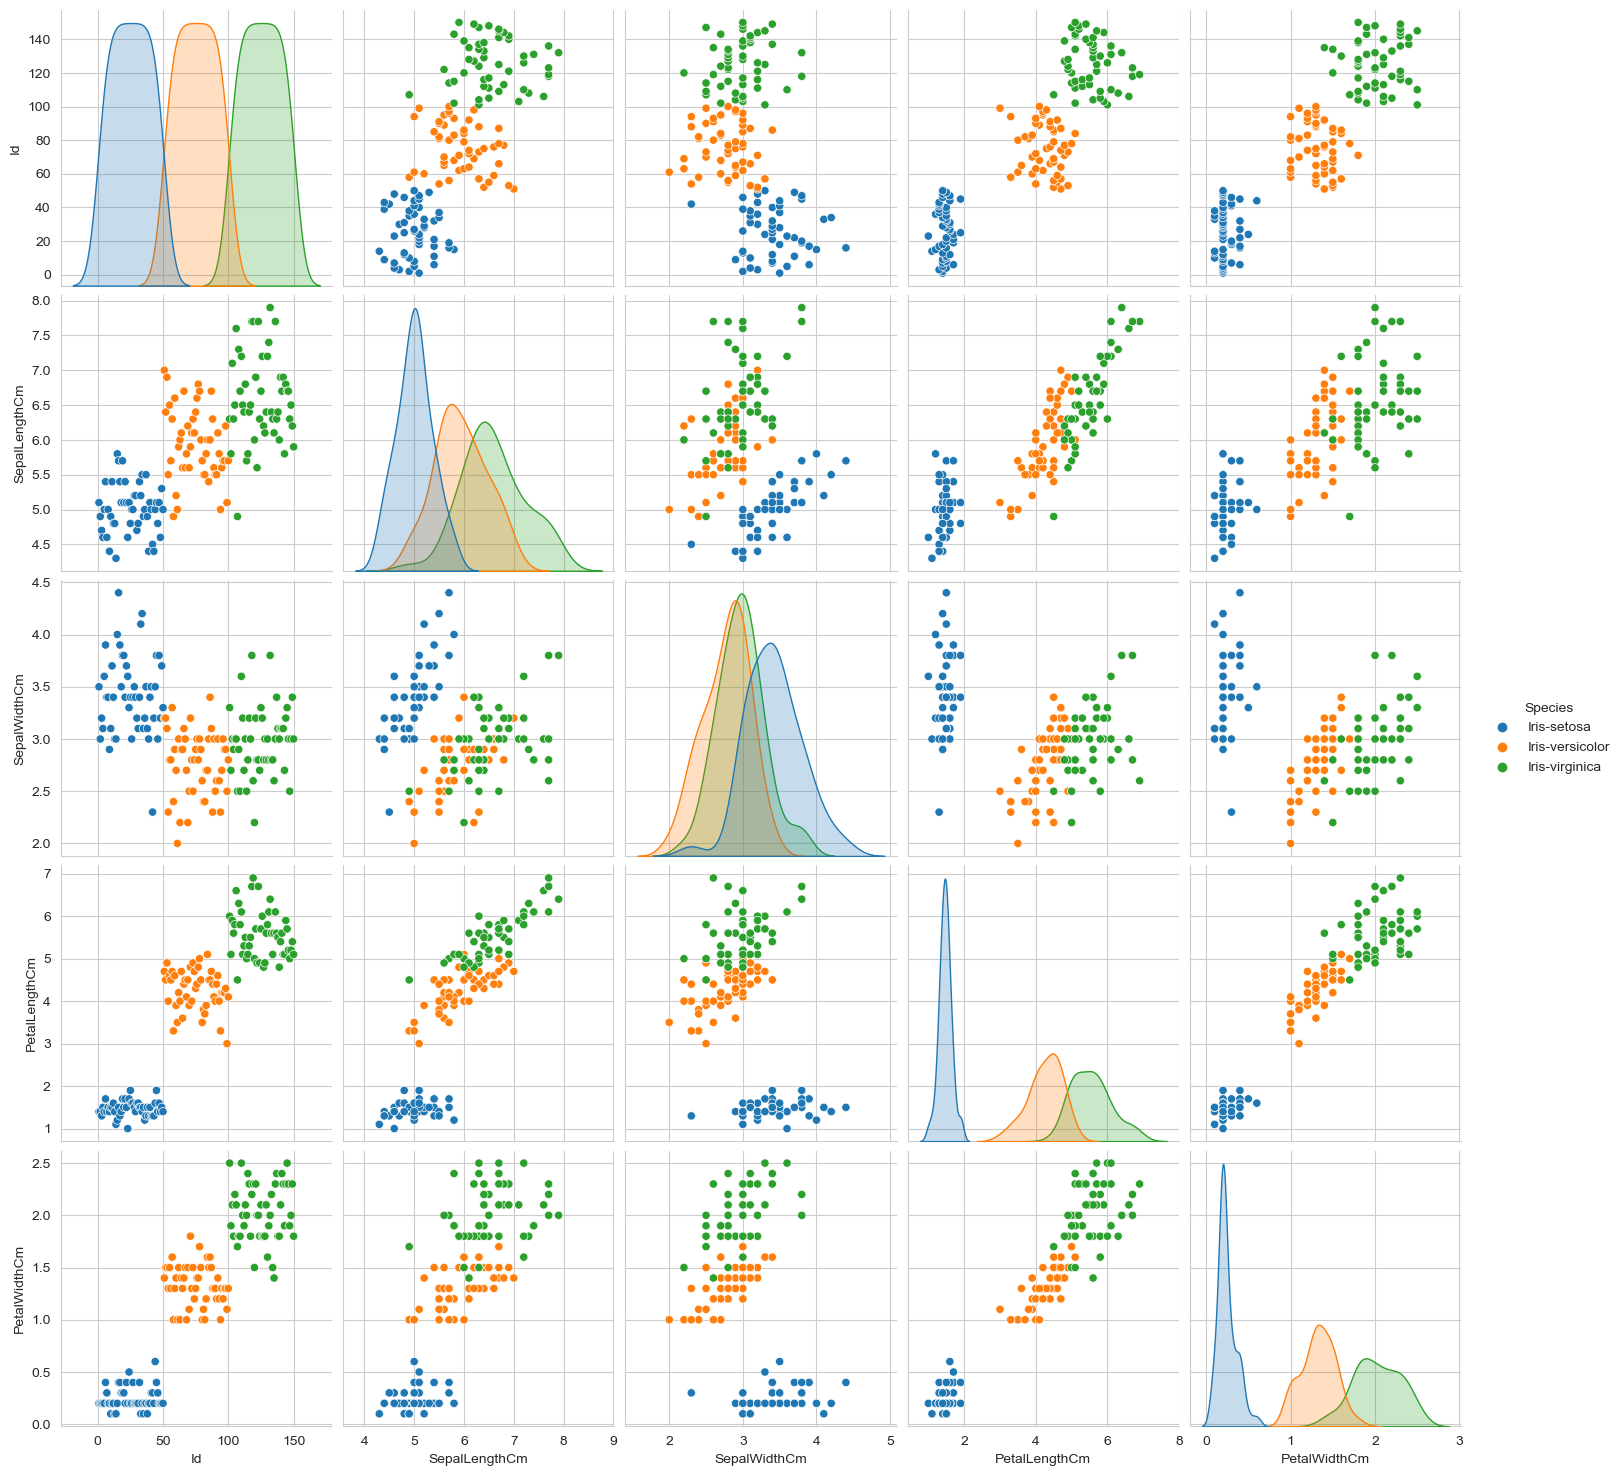

In [7]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="Species",size=3);
plt.show()

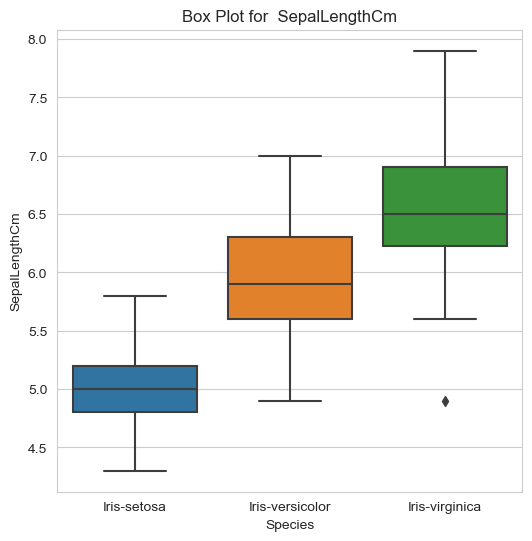

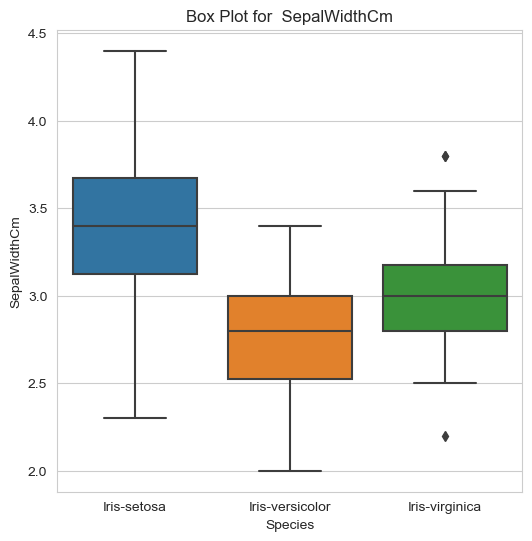

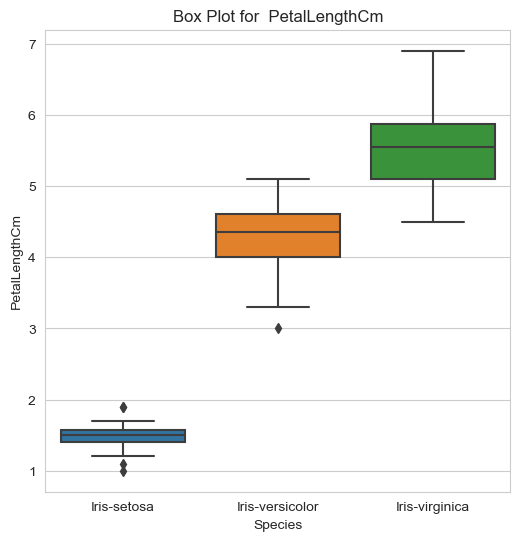

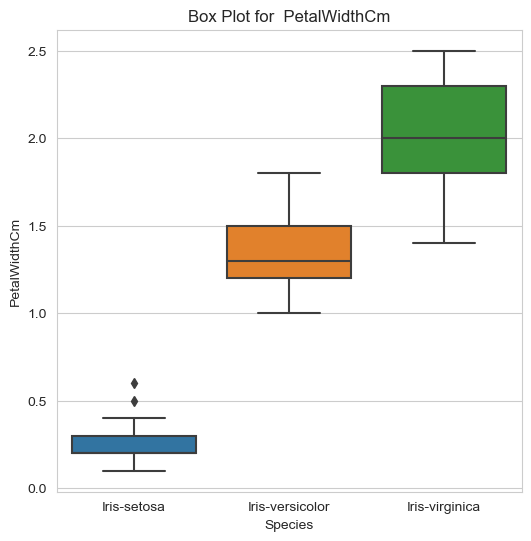

In [8]:
cols=df.columns[1:-1]
for col in cols:
    plt.figure(figsize=(6,6))
    sns.boxplot(data=df,x='Species',y=col)
    plt.title(f'Box Plot for  {col}')

<Figure size 800x600 with 0 Axes>

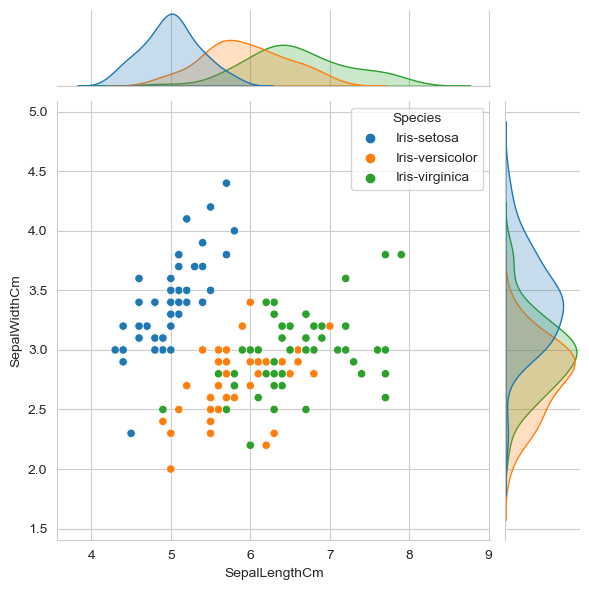

<Figure size 800x600 with 0 Axes>

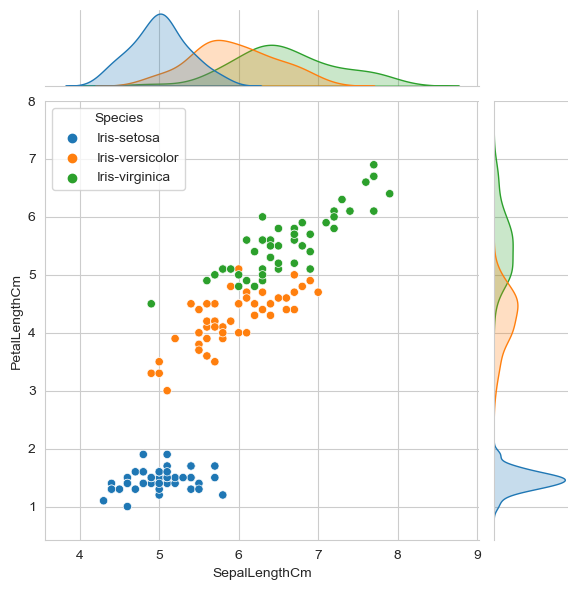

<Figure size 800x600 with 0 Axes>

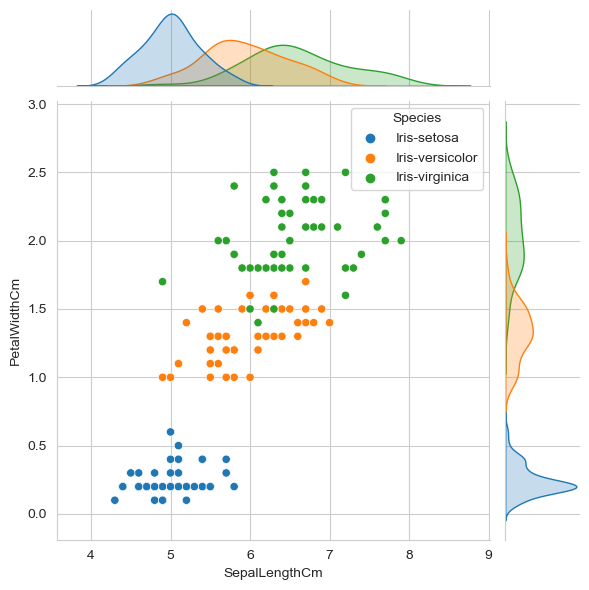

<Figure size 800x600 with 0 Axes>

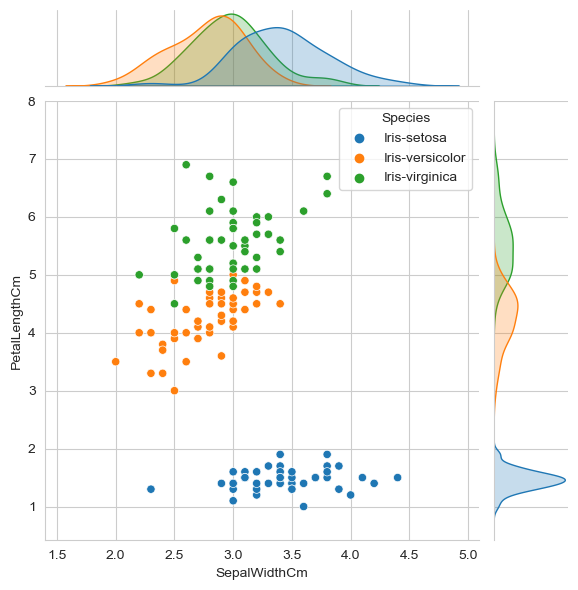

<Figure size 800x600 with 0 Axes>

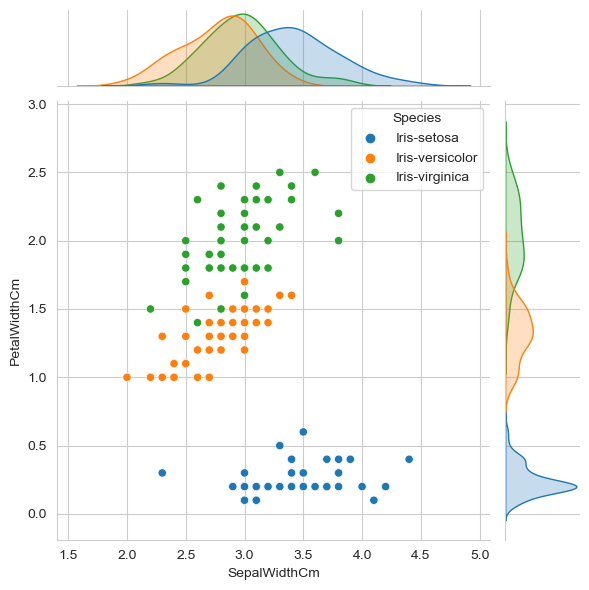

<Figure size 800x600 with 0 Axes>

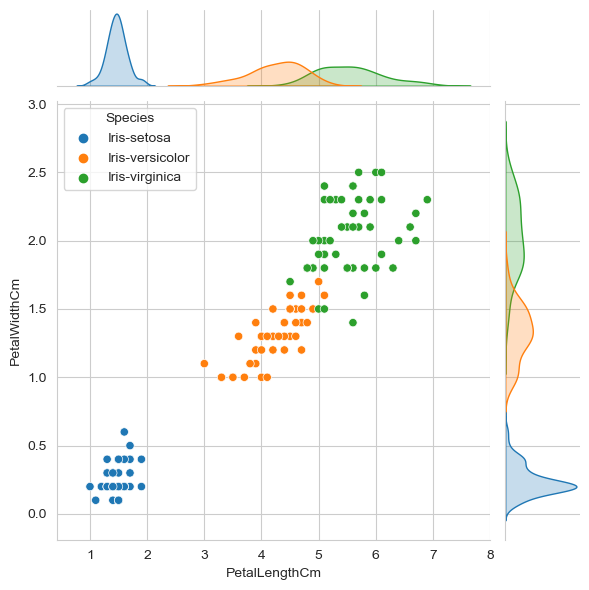

In [9]:
cols=df.columns[1:-1]
num=len(cols)

for i in range(0,num-1):
    for j in range (i+1,num):
        plt.figure(figsize=(8,6))
        sns.jointplot(x=cols[i], y=cols[j], data=df,hue='Species')

In [10]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
df2=df.copy()
mapping={'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3}
df2['Species']=df2['Species'].map(mapping)


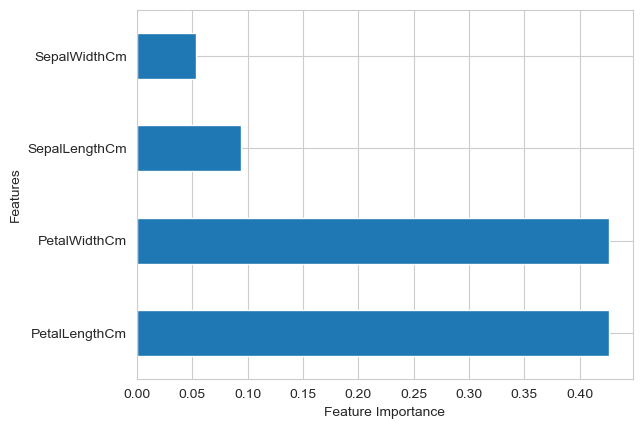

In [12]:
X = df2.drop(['Species','Id'], axis = 1) # features

y = df2['Species'] # target
feat_selection = ExtraTreesClassifier()
feat_selection.fit(X, y)
feat_importances = pd.Series(feat_selection.feature_importances_, index = X.columns)
feat_importances.nlargest(len(df.columns)).plot(kind = 'barh')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

In [13]:
feat_importances.sort_values(ascending = False)

PetalLengthCm    0.426731
PetalWidthCm     0.426073
SepalLengthCm    0.093724
SepalWidthCm     0.053472
dtype: float64

**SEPAL LENGTH AND SEPAL WIDTH HAVE LESS EFFECT ON SPECIES TYPE**

# best k values with respect to score

In [14]:
X = df.drop(['Species','Id'],axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

# Create neighbors
neighbors = np.arange(1, 35)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
print(f'Train Accuracies: \n{train_accuracies}\n\nTest Accuracies: \n{test_accuracies}')

Train Accuracies: 
{1: 1.0, 2: 0.9833333333333333, 3: 0.9583333333333334, 4: 0.9666666666666667, 5: 0.9583333333333334, 6: 0.975, 7: 0.9833333333333333, 8: 0.975, 9: 0.9666666666666667, 10: 0.975, 11: 0.9833333333333333, 12: 0.9833333333333333, 13: 0.9833333333333333, 14: 0.975, 15: 0.975, 16: 0.975, 17: 0.975, 18: 0.9666666666666667, 19: 0.975, 20: 0.9666666666666667, 21: 0.9666666666666667, 22: 0.95, 23: 0.975, 24: 0.9416666666666667, 25: 0.9583333333333334, 26: 0.95, 27: 0.95, 28: 0.9416666666666667, 29: 0.95, 30: 0.95, 31: 0.9583333333333334, 32: 0.95, 33: 0.9583333333333334, 34: 0.95}

Test Accuracies: 
{1: 0.9666666666666667, 2: 0.9666666666666667, 3: 0.9666666666666667, 4: 0.9666666666666667, 5: 1.0, 6: 0.9666666666666667, 7: 1.0, 8: 1.0, 9: 1.0, 10: 0.9666666666666667, 11: 0.9666666666666667, 12: 0.9666666666666667, 13: 1.0, 14: 0.9666666666666667, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0, 20: 1.0, 21: 1.0, 22: 0.9666666666666667, 23: 0.9333333333333333, 24: 0.96666666666666

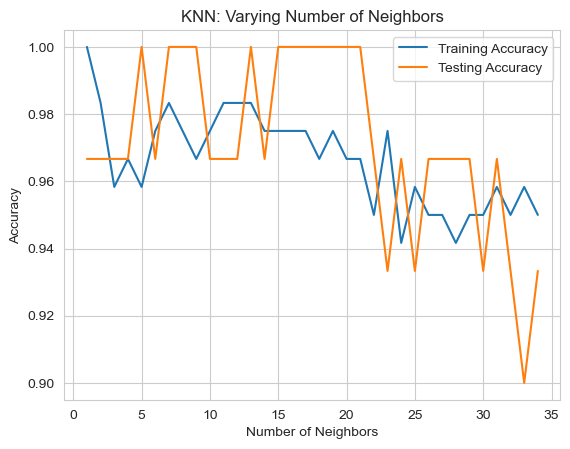

In [15]:
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

# best k values with respect to error

Text(0, 0.5, 'Mean Error')

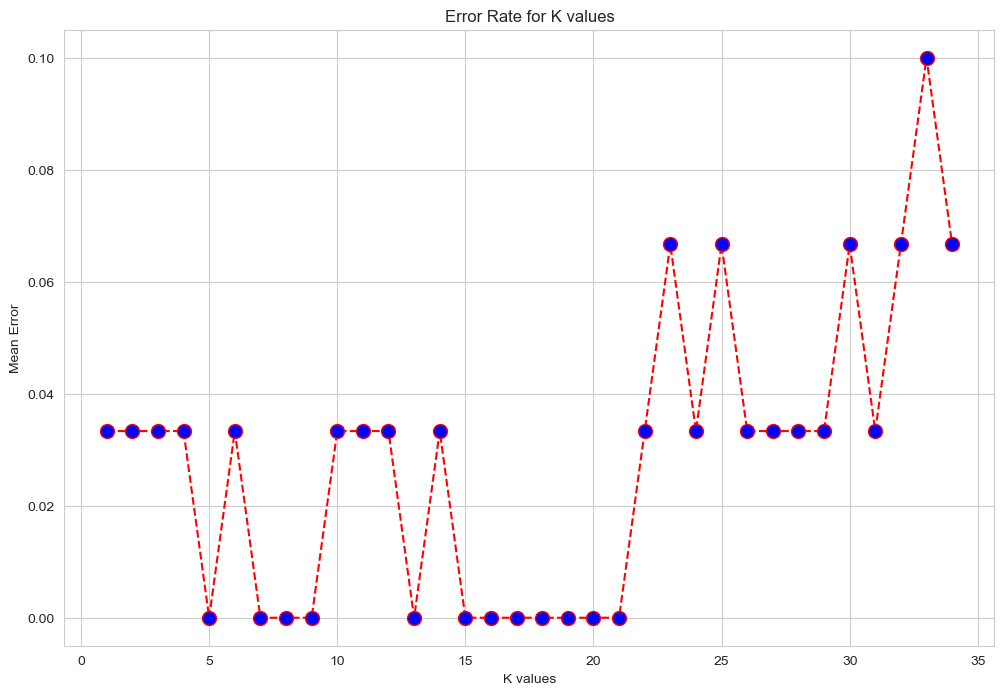

In [16]:
error=[]

for i in range(1,35):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i!=y_test))

plt.figure(figsize=(12,8))
plt.plot(range(1,35),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate for K values')
plt.xlabel('K values')
plt.ylabel('Mean Error')


# for k value 5 and between 7 and 9 error is minimun
**#but for k=5 train and test accuracy has differences
#for that k=7 is selected**

In [17]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.9833333333333333

In [18]:
#relation between parameters:

X = df.drop(['Species','Id'],axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)
weight=['uniform','distance']

score_=[]
k_value_=[]
weight_=[]
for w in weight:
    for n in range(1,8):
        knn = KNeighborsClassifier(n_neighbors=n,weights=w)
        k_value_.append(n)
        weight_.append(w)
        knn.fit(X_train, y_train)
        scr=knn.score(X_train, y_train)
        score_.append(scr)

score_tab=pd.DataFrame({'WEIGHT':weight_,'K_VALUE':k_value_,'SCORE':score_})

score_tab


,WEIGHT,K_VALUE,SCORE
0,uniform,1,1.000000
1,uniform,2,0.983333
2,uniform,3,0.958333
3,uniform,4,0.966667
4,uniform,5,0.958333
5,uniform,6,0.975000
6,uniform,7,0.983333
7,distance,1,1.000000
8,distance,2,1.000000
9,distance,3,1.000000


<Axes: xlabel='K_VALUE', ylabel='SCORE'>

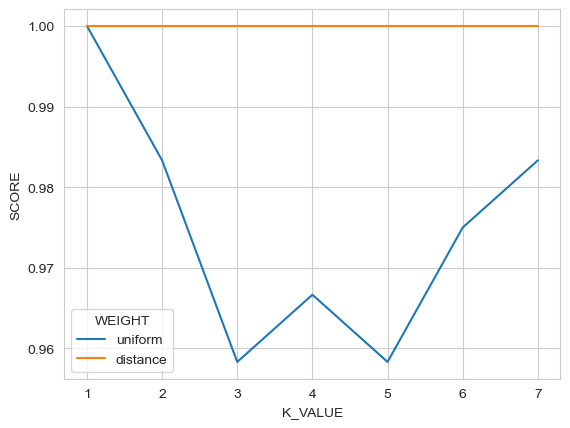

In [19]:
sns.lineplot(data=score_tab ,x='K_VALUE',y='SCORE',hue='WEIGHT')

In [20]:
def hyperparameter_tunning(estimator, X_train, y_train, param_grid, score = 'accuracy', n = 5):

    '''This function is used to find the best set of hyperparameters for the model to optimize its performance'''


    # Perform grid search
    grid_search = GridSearchCV(estimator = estimator,
                               param_grid = param_grid,
                               scoring = score,
                               cv = n)

    # Fit the data
    grid_search.fit(X_train,y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Print the best parameters and score
    print(f'Best parameters: {best_params} \n')
    print(f'Best score: {best_score}')

    # best estimator
    best_estimator = grid_search.best_estimator_

    return best_estimator

In [21]:
param_grid = {
    'n_neighbors': [1,2,3,4,5,6,7,8,9,20,25,35],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidian', 'manhattan']
}
best_estimator = hyperparameter_tunning(knn, X_train, y_train, param_grid, score = 'accuracy', n = 5)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'} 

Best score: 0.9583333333333334


In [22]:
knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 9, weights ='uniform')
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.9666666666666667

# combination of feature

In [29]:
from itertools import combinations

f=[]
s=[]
fet=df.drop(['Species','Id'],axis=1).columns
for i in range (1,num+1):
    print(i,)
    l=list(combinations(fet, i))
    print(l,"@@@@@@@@@")
    comb_len=len(l)
    for j in l:
        feta=list(j)
        f.append(feta)
        X = df.drop(['Species','Id'],axis=1)
        y = df['Species']
        X=X[feta]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)


        knn = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 9, weights ='uniform')
        knn.fit(X_train, y_train)
        sc=knn.score(X_train, y_train)
        s.append(sc)






scrr=pd.DataFrame({'Feature':f,'Score':s})
scrr

1
[('SepalLengthCm',), ('SepalWidthCm',), ('PetalLengthCm',), ('PetalWidthCm',)] @@@@@@@@@
2
[('SepalLengthCm', 'SepalWidthCm'), ('SepalLengthCm', 'PetalLengthCm'), ('SepalLengthCm', 'PetalWidthCm'), ('SepalWidthCm', 'PetalLengthCm'), ('SepalWidthCm', 'PetalWidthCm'), ('PetalLengthCm', 'PetalWidthCm')] @@@@@@@@@
3
[('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm'), ('SepalLengthCm', 'SepalWidthCm', 'PetalWidthCm'), ('SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm'), ('SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm')] @@@@@@@@@
4
[('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm')] @@@@@@@@@


,Feature,Score
0,[SepalLengthCm],0.708333
1,[SepalWidthCm],0.550000
2,[PetalLengthCm],0.958333
3,[PetalWidthCm],0.958333
4,"[SepalLengthCm, SepalWidthCm]",0.800000
5,"[SepalLengthCm, PetalLengthCm]",0.958333
6,"[SepalLengthCm, PetalWidthCm]",0.958333
7,"[SepalWidthCm, PetalLengthCm]",0.950000
8,"[SepalWidthCm, PetalWidthCm]",0.966667
9,"[PetalLengthCm, PetalWidthCm]",0.958333
